In [39]:
# Read in our dataset from "Data_Preprocessing.ipynb" kernel
# This line should work if everything is setup correctly
knn_data = clean_data
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 991384 to 183555
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  float64
 1   Flow Duration      1048575 non-null  float64
 2   TotLen Fwd Pkts    1048575 non-null  float64
 3   Fwd Pkt Len Max    1048575 non-null  float64
 4   Fwd Pkt Len Min    1048575 non-null  float64
 5   Fwd Pkt Len Mean   1048575 non-null  float64
 6   Bwd Pkt Len Max    1048575 non-null  float64
 7   Bwd Pkt Len Min    1048575 non-null  float64
 8   Bwd Pkt Len Mean   1048575 non-null  float64
 9   Flow IAT Mean      1048575 non-null  float64
 10  Bwd IAT Tot        1048575 non-null  float64
 11  Bwd IAT Mean       1048575 non-null  float64
 12  Bwd IAT Max        1048575 non-null  float64
 13  Bwd IAT Min        1048575 non-null  float64
 14  Fwd PSH Flags      1048575 non-null  float64
 15  Pkt Len Var        1048575 n

In [40]:
X = knn_data
y = knn_data["Label"].astype(int)
X = X.drop(columns="Label")

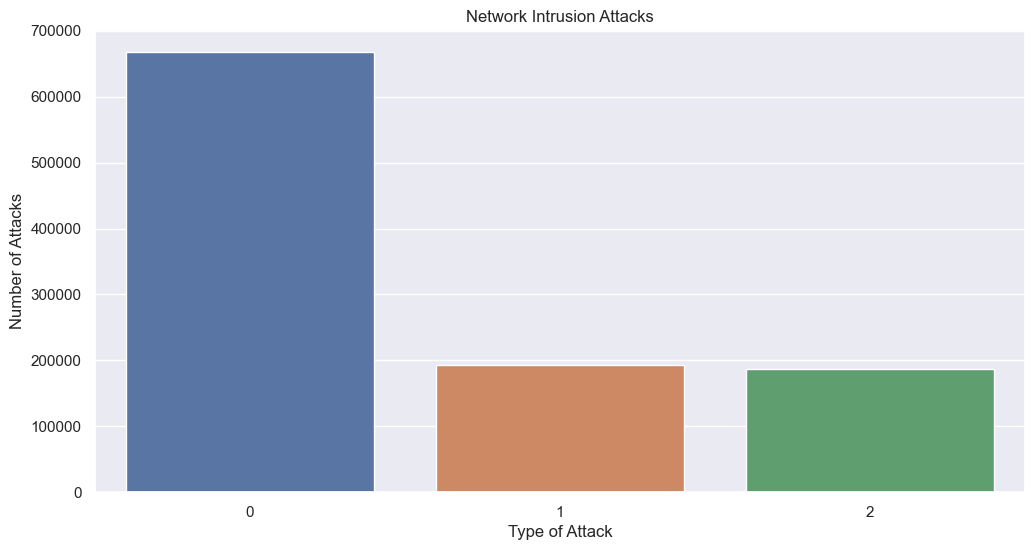

In [41]:
# Bar graph showing the same information as our pie chart
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Type of Attack')
ax = sns.countplot(x=y, data=knn_data)
ax.set(xlabel='Type of Attack', ylabel='Number of Attacks')
plt.title('Network Intrusion Attacks')
plt.show()

In [42]:
print(X.shape)
print(pd.DataFrame(X).describe())

(1048575, 24)
           Dst Port  Flow Duration  TotLen Fwd Pkts  Fwd Pkt Len Max  \
count  1.048575e+06   1.048575e+06     1.048575e+06     1.048575e+06   
mean   5.027992e-18  -6.617451e-23     5.211243e-22     1.116496e-19   
std    2.203994e-01   1.371177e-03     1.831498e-03     4.464173e-03   
min   -7.440926e-02  -9.998762e-01    -5.214349e-05    -2.709087e-03   
25%   -7.407355e-02  -6.805937e-06    -5.214349e-05    -2.709087e-03   
50%   -7.360050e-02  -6.804832e-06    -4.795333e-05    -2.181465e-03   
75%   -6.764930e-02  -6.363495e-06     8.154936e-07     3.790566e-04   
max    9.255907e-01   1.237521e-04     9.999479e-01     9.972909e-01   

       Fwd Pkt Len Min  Fwd Pkt Len Mean  Bwd Pkt Len Max  Bwd Pkt Len Min  \
count     1.048575e+06      1.048575e+06     1.048575e+06     1.048575e+06   
mean      6.520042e-19     -4.075026e-18     9.391910e-18     5.138530e-18   
std       1.334437e-02      4.753383e-03     3.382594e-01     6.357682e-02   
min      -5.746257e-03   

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(len(y))

(891288, 24) (157287, 24) (891288,) (157287,)
1048575


In [44]:
K = int(sqrt(len(y)-1))
print("K =", K)

K = 1023


In [45]:
# P=2 is for euclidean distance
knn = KNeighborsClassifier(n_neighbors=K, p=2, metric='euclidean')

In [46]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [47]:
knn.score(X_test, y_test)

0.9995422380743482

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100076     54     14]
 [     0  29004      0]
 [     0      4  28135]]


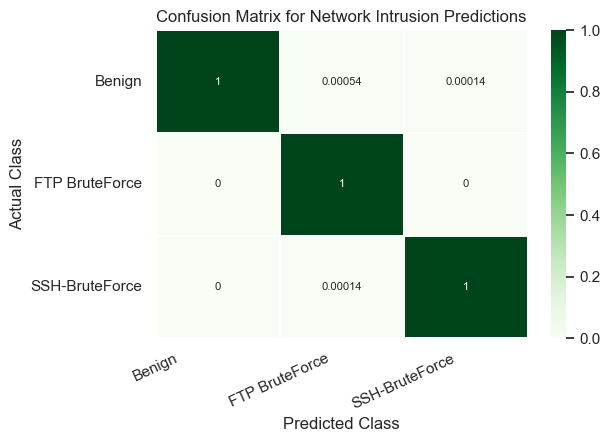

In [49]:
labels = ["Benign", "FTP BruteForce", "SSH-BruteForce"]
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, annot_kws={'size':8}, cmap=plt.cm.Greens, linewidths=0.2)

tick_marks = np.arange(len(labels))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels, rotation=25)
plt.yticks(tick_marks2, labels, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Network Intrusion Predictions')
plt.show()

In [52]:
print(f1_score(y_test, y_pred, average='weighted'))

0.9995423589912668


In [55]:
print(accuracy_score(y_test, y_pred))

0.9995422380743482


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100144
           1       1.00      1.00      1.00     29004
           2       1.00      1.00      1.00     28139

    accuracy                           1.00    157287
   macro avg       1.00      1.00      1.00    157287
weighted avg       1.00      1.00      1.00    157287

